<a href="https://colab.research.google.com/github/chadha-code1/My-Data-Science-Portfolio/blob/main/Hybrid_Retail_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and Explore Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

os.chdir('/content/drive/MyDrive/datasets')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/dataset2.csv',delimiter=';')
dfc=df.copy()

df.head()

,id_carte_fidélité,nom_carte_fidelite,Nombre_A_ou_MA,Type_Rec,Date,Secteur,localité,id_client,nom_prenom,Tampon_Rec_reçu,Nombre_ou_Montant_actuel
0,86,DIAMANT Fleur de Lys,1,0,2022-07-27 17:00:08.0000000,Instituts de beauté,El Menzah 5,1,Borhen Jlidi,0,1
1,112,BEIT EL FEN,306,1,2022-10-17 18:27:05.0000000,Restaurants,Marsa Erriadh,1,Borhen Jlidi,3,6
2,72,MUGS BURGER,1,0,2022-04-03 01:18:14.0000000,Restaurants,Berge Du Lac,1,Borhen Jlidi,0,1
3,6,fidélité Tüna Food,1,0,2021-09-20 14:06:15.0000000,Restaurants,Berge Du Lac,7,Ghanmi Houssein,0,1
4,6,fidélité Tüna Food,2,0,2021-09-20 14:07:55.0000000,Restaurants,Berge Du Lac,7,Ghanmi Houssein,0,2


In [ ]:
df.shape

(4824, 11)

**Data Process**

In [ ]:
df = df.drop(['Nombre_ou_Montant_actuel', 'Tampon_Rec_reçu'], axis=1)


In [ ]:
import re

def clean_name(name):
    name_str = str(name)  # Convert to string
    if name_str.isnumeric():
        return "Unknown"
    return  re.sub(r'[^a-zA-Z0-9\s]', '', name_str)


#df['nom_prenom'] = df['nom_prenom'].replace(r'^[0-9a-zA-Z]+$', 'unknown', regex=True)


In [ ]:
# Apply the modified function to the 'nom_prenom' column in your dataset
df['nom_prenom'] = df['nom_prenom'].apply(lambda x: clean_name(x))

# Display the cleaned dataset
df.info

<bound method DataFrame.info of       id_carte_fidélité    nom_carte_fidelite  Nombre_A_ou_MA  Type_Rec  \
0                    86  DIAMANT Fleur de Lys               1         0   
1                   112           BEIT EL FEN             306         1   
2                    72           MUGS BURGER               1         0   
3                     6    fidélité Tüna Food               1         0   
4                     6    fidélité Tüna Food               2         0   
...                 ...                   ...             ...       ...   
4819                 92                 COSTE               1         0   
4820                 92                 COSTE               2         0   
4821                132   Madeleine et Proust              30         1   
4822                 92                 COSTE               1         0   
4823                140      Espace Al jazira              62         1   

                             Date  \
0     2022-07-27 17:00:08.0000

In [ ]:
client_213 = df.loc[df['id_client'] == 206]
client_213

,id_carte_fidélité,nom_carte_fidelite,Nombre_A_ou_MA,Type_Rec,Date,Secteur,localité,id_client,nom_prenom
355,22,CHURROS PER FAVOR\t,1,0,2021-10-13 16:31:22.0000000,Restaurants,Marsa Erriadh,206,Chabchoub Briki Acha


In [ ]:
unknown_rows = df[df['nom_prenom'] == 'Unknown']

print(unknown_rows)

      id_carte_fidélité   nom_carte_fidelite  Nombre_A_ou_MA  Type_Rec  \
12                   15          THE BUFFALO               1         0   
13                   15          THE BUFFALO               2         0   
14                   15          THE BUFFALO               3         0   
15                   15          THE BUFFALO               4         0   
16                   15          THE BUFFALO               5         0   
...                 ...                  ...             ...       ...   
617                  15          THE BUFFALO               1         0   
618                  15          THE BUFFALO               2         0   
639                  15          THE BUFFALO               1         0   
694                  22  CHURROS PER FAVOR\t               1         0   
1150                 22  CHURROS PER FAVOR\t               1         0   

                             Date      Secteur       localité  id_client  \
12    2021-09-27 17:56:58.0000000  

In [ ]:
df = df.drop(index=df[df['nom_prenom'] == 'Unknown'].index)
df

,id_carte_fidélité,nom_carte_fidelite,Nombre_A_ou_MA,Type_Rec,Date,Secteur,localité,id_client,nom_prenom
0,86,DIAMANT Fleur de Lys,1,0,2022-07-27 17:00:08.0000000,Instituts de beauté,El Menzah 5,1,Borhen Jlidi
1,112,BEIT EL FEN,306,1,2022-10-17 18:27:05.0000000,Restaurants,Marsa Erriadh,1,Borhen Jlidi
2,72,MUGS BURGER,1,0,2022-04-03 01:18:14.0000000,Restaurants,Berge Du Lac,1,Borhen Jlidi
3,6,fidélité Tüna Food,1,0,2021-09-20 14:06:15.0000000,Restaurants,Berge Du Lac,7,Ghanmi Houssein
4,6,fidélité Tüna Food,2,0,2021-09-20 14:07:55.0000000,Restaurants,Berge Du Lac,7,Ghanmi Houssein
...,...,...,...,...,...,...,...,...,...
4819,92,COSTE,1,0,2023-01-27 09:33:01.0000000,Restaurants,Marsa Erriadh,3534,omelliti851
4820,92,COSTE,2,0,2023-01-27 09:33:09.0000000,Restaurants,Marsa Erriadh,3534,omelliti851
4821,132,Madeleine et Proust,30,1,NaN,Pates alimentaires,Berge Du Lac,3535,medbelhad1999
4822,92,COSTE,1,0,2023-01-27 13:12:48.0000000,Restaurants,Marsa Erriadh,3535,medbelhad1999


In [ ]:
print(df[df['nom_prenom'] == 'unknown'])


Empty DataFrame
Columns: [id_carte_fidélité, nom_carte_fidelite, Nombre_A_ou_MA, Type_Rec, Date, Secteur, localité, id_client, nom_prenom]
Index: []


In [ ]:
nbrA = df[df['Type_Rec'] == 0]
nbrA = nbrA.drop(['Type_Rec'], axis=1)
nbrA.head()

,id_carte_fidélité,nom_carte_fidelite,Nombre_A_ou_MA,Date,Secteur,localité,id_client,nom_prenom
0,86,DIAMANT Fleur de Lys,1,2022-07-27 17:00:08.0000000,Instituts de beauté,El Menzah 5,1,Borhen Jlidi
2,72,MUGS BURGER,1,2022-04-03 01:18:14.0000000,Restaurants,Berge Du Lac,1,Borhen Jlidi
3,6,fidélité Tüna Food,1,2021-09-20 14:06:15.0000000,Restaurants,Berge Du Lac,7,Ghanmi Houssein
4,6,fidélité Tüna Food,2,2021-09-20 14:07:55.0000000,Restaurants,Berge Du Lac,7,Ghanmi Houssein
5,6,fidélité Tüna Food,3,2021-09-20 14:08:00.0000000,Restaurants,Berge Du Lac,7,Ghanmi Houssein


**Similarity table of clients scaled()**

In [ ]:
df_dup = nbrA.drop_duplicates(['id_carte_fidélité', 'id_client'])


In [ ]:
df_dup.shape

(843, 8)

In [ ]:
interaction_matrix = df_dup.pivot(index='id_client', columns='id_carte_fidélité', values='Nombre_A_ou_MA').fillna(0)
interaction_matrix.head()

id_carte_fidélité,1,2,3,4,5,6,10,11,12,14,...,130,133,134,135,136,137,138,141,144,145
id_client,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scaler = StandardScaler()
interaction_matrix_scaled = scaler.fit_transform(interaction_matrix)
# Initialize the KNN model with cosine similarity
model_knn = NearestNeighbors(metric='cosine', n_neighbors=5)  # Considering 5 neighbors, including the client itself

model_knn.fit(interaction_matrix_scaled)

NearestNeighbors(metric='cosine')

In [ ]:
distances, indices = model_knn.kneighbors(interaction_matrix_scaled)

In [ ]:
clt_sim = pd.DataFrame(indices, columns=['client0', 'client1', 'client2', 'client3', 'client4'])

clt_sim.head()

,client0,client1,client2,client3,client4
0,0,194,170,165,168
1,1,2,111,82,637
2,2,4,68,11,76
3,3,7,30,589,622
4,4,2,637,595,622


In [ ]:
clt_sim.shape


(667, 5)

In [ ]:
client_ = clt_sim.copy()
for i in range(0, 5):
    movies = pd.DataFrame(interaction_matrix.index).reset_index()
    movies = movies.rename(columns={'index': f'client{i}'})
    client_ = pd.merge(client_, movies, on=[f'client{i}'], how='left')
    client_ = client_.drop(columns=[f'client{i}'])
    client_ = client_.rename(columns={'id_client': f'client{i}'})
client_.head(10)


,client0,client1,client2,client3,client4
0,1,1042,988,981,986
1,7,34,812,668,3342
2,34,48,322,99,368
3,43,68,169,3132,3289
4,48,34,3342,3168,3289
5,62,678,81,667,679
6,67,275,3168,1004,904
7,68,43,169,3132,3289
8,81,678,62,667,679
9,97,209,371,208,189


In [ ]:
# Define the number of top similar clients to extract
N = 5  # Change this value as needed

# Dictionary to store top similar clients for each client
top_similar_clients = {}

# Loop through each column (client) in the similarity table
for column in client_.columns:
    # Get the current client
    client = column

    # Get the top N similar clients by sorting the column
    top_n_similar_clients = client_[column].sort_values(ascending=False).head(N + 1)  # Include the client itself

    # Exclude the current client from the list
    top_n_similar_clients = top_n_similar_clients[top_n_similar_clients.index != client]

    # Store the top similar clients in the dictionary
    top_similar_clients[client] = top_n_similar_clients.index.tolist()

# Print top similar clients for each client
for client, similar_clients in top_similar_clients.items():
    print(f"Client: {client}")
    print(f"Top Similar Clients: {similar_clients}")
    print()


Client: client0
Top Similar Clients: [664, 661, 666, 244, 332, 511]

Client: client1
Top Similar Clients: [243, 645, 646, 631, 314, 572]

Client: client2
Top Similar Clients: [337, 552, 191, 645, 646, 155]

Client: client3
Top Similar Clients: [631, 337, 549, 548, 547, 536]

Client: client4
Top Similar Clients: [666, 251, 252, 244, 511, 565]



**cosine metric**

In [ ]:

# Load data into the pivotA table
pivotA = nbrA.pivot_table(index='id_client', columns='id_carte_fidélité', values='Nombre_A_ou_MA')

# Replace NaN values with 0
pivotA = pivotA.fillna(0)

# Calculate the similarity matrix between boutiques
boutique_similarity_matrix = cosine_similarity(pivotA.T)  # Transpose pivotA to have boutiques as columns

# Define the target boutique for recommendation
id_carte_fidélité = 10

# Get the index of the target boutique
target_boutique_index = pivotA.columns.get_loc(id_carte_fidélité)

# Define the number of recommended clients
N = 5

# Get the most similar clients for the target boutique
similar_clients_indices = boutique_similarity_matrix[target_boutique_index].argsort()[:-N-1:-1]

# Get the actual client IDs based on indices
recommended_client_ids = pivotA.index[similar_clients_indices]

# Map client IDs to client names using the id_to_name_mapping dictionary
id_to_name_mapping = nbrA.set_index('id_client')['nom_prenom'].to_dict()

recommended_client_names = [id_to_name_mapping.get(client_id, 'Unknown') for client_id in recommended_client_ids]

# Print the recommended client names
for i, client_name in enumerate(recommended_client_names):
    print(f"Top {i+1} Recommendation: {client_name}")


Top 1 Recommendation: hadhiri helmi
Top 2 Recommendation: Ben Abdrabbah Sandra
Top 3 Recommendation: riadh hajjej 
Top 4 Recommendation: Bouita Walid
Top 5 Recommendation: Ben Gouider Aymen


**NORMALISATION DE NBRA**

In [ ]:
c=nbrA.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select the features to normalize
features_to_normalize = ['Nombre_A_ou_MA']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected features
normalized_features = scaler.fit_transform(c[features_to_normalize])

# Replace the original features with the normalized values
c[features_to_normalize] = normalized_features
c.head()

,id_carte_fidélité,nom_carte_fidelite,Nombre_A_ou_MA,Date,Secteur,localité,id_client,nom_prenom
0,86,DIAMANT Fleur de Lys,0.000000,2022-07-27 17:00:08.0000000,Instituts de beauté,El Menzah 5,1,Borhen Jlidi
2,72,MUGS BURGER,0.000000,2022-04-03 01:18:14.0000000,Restaurants,Berge Du Lac,1,Borhen Jlidi
3,6,fidélité Tüna Food,0.000000,2021-09-20 14:06:15.0000000,Restaurants,Berge Du Lac,7,Ghanmi Houssein
4,6,fidélité Tüna Food,0.008772,2021-09-20 14:07:55.0000000,Restaurants,Berge Du Lac,7,Ghanmi Houssein
5,6,fidélité Tüna Food,0.017544,2021-09-20 14:08:00.0000000,Restaurants,Berge Du Lac,7,Ghanmi Houssein


**Top N secteur**

In [ ]:
from scipy.sparse import coo_matrix

# Create a pivot table with clients as rows, sectors as columns, and interaction values as entries
pivots = c.pivot_table(index='id_client', columns='Secteur', values='Nombre_A_ou_MA', aggfunc='sum').fillna(0)

# Convert the pivot table to a sparse matrix for memory efficiency
interaction_matrix_sparse = coo_matrix(pivots)

target_client_index = 1
N = 5  # Number of recommended sectors
# predicted interaction matrix
interaction_matrix_pred = np.random.rand(pivots.shape[0], pivots.shape[1])

# Make recommendations for a given client
recommended_sectors = np.argsort(interaction_matrix_pred[target_client_index])[::-1][:N]

# Map sector indices to sector names using a dictionary
sector_names_dict = dict(enumerate(pivots.columns))
recommended_sector_names = [sector_names_dict.get(sector_index, 'unknown') for sector_index in recommended_sectors]

# Print the recommended sector names
for i, sector_name in enumerate(recommended_sector_names):
    print(f"Top {i+1} Sectors: {sector_name}")


Top 1 Sectors: Agro-alimentaire
Top 2 Sectors: Cafeterias - Snacks
Top 3 Sectors: Aromes et Epices
Top 4 Sectors: Esthétique
Top 5 Sectors: Pharmacies


evaluation secteur


**KNN top N approach**

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# Load data into the pivotA table
pivotB = c.pivot_table(index='id_client', columns='id_carte_fidélité', values='Nombre_A_ou_MA')

# Replace NaN values with 0
pivotB = pivotB.fillna(0)

# Calculate the similarity matrix between clients
#client_similarity_matrix = cosine_similarity(pivotB)

client_similarity_matrix = pairwise_distances(pivotB, metric='euclidean')
# Define the target boutique for recommendation
target_boutique_id = 10  # Replace with the actual boutique ID

# Get the index of the target boutique
target_boutique_index = pivotB.columns.get_loc(target_boutique_id)

# Define the number of recommended clients


# Use KNN to find similar clients
k = 5  # Number of neighbors
model_knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
model_knn.fit(pivotB.T)  # Transpose pivot to have boutiques as columns .t

# Find the indices of the k most similar clients
similar_client_indices = model_knn.kneighbors([pivotB.iloc[:, target_boutique_index]])[1][0]

# Get the actual client IDs based on indices
recommended_client_ids = pivotB.index[similar_client_indices]

# Map client IDs to client names using the id_to_name_mapping dictionary
id_to_name_mapping = nbrA.set_index('id_client')['nom_prenom'].to_dict()

recommended_client_names = [id_to_name_mapping.get(client_id, 'unknown') for client_id in recommended_client_ids]

# Print the recommended client names
for i, client_name in enumerate(recommended_client_names):
    print(f"Top {i+1} Clients: {client_name}")


Top 1 Clients: hadhiri helmi
Top 2 Clients: KhelifYasmine
Top 3 Clients: riadh hajjej 
Top 4 Clients: NejiHedi
Top 5 Clients: BEN SFAR hassen 


**Grid search Evaluation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors

# the interaction_matrix_sparse and pivotB are ready
param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'metric': ['euclidean', 'cosine', 'manhattan']
}

# Create a KNN model
knn = NearestNeighbors()

# Create a custom scoring function that returns a constant value
def custom_scoring(estimator, X):
    return 0.0

# Create the grid search object with the custom scoring function
grid_search = GridSearchCV(knn, param_grid, scoring=custom_scoring, cv=3)

# Fit the grid search to your data
grid_search.fit(pivotB.T)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 5}


**evaluation  KNN**

get actual interactions

In [ ]:
# id_carte_fidélité: Boutique ID
# id_client: Client ID
# Nombre_A_ou_MA: Number of times the client visited the boutique

# Group by boutique ID and client ID, and sum the 'Nombre_A_ou_MA' column
boutique_client_interactions = nbrA.groupby(['id_carte_fidélité', 'id_client'])['Nombre_A_ou_MA'].sum().reset_index()

# Create the actual_interactions dictionary
actual_interactions = {}
for index, row in boutique_client_interactions.iterrows():
    boutique_id = row['id_carte_fidélité']
    client_id = row['id_client']

    if boutique_id not in actual_interactions:
        actual_interactions[boutique_id] = []

    # Add the client ID to the list based on the number of interactions
    actual_interactions[boutique_id].extend([client_id] * int(row['Nombre_A_ou_MA']))

# Print the actual_interactions dictionary
print(actual_interactions)


{1: [34, 48], 2: [34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34], 3: [7, 7, 7, 34], 4: [62, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 99, 99, 99, 99, 99, 99, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 61

get predicted interactions

In [ ]:
recommended_items = {}

# Get the boutique IDs from the columns of pivotB
boutique_ids = pivotB.columns

# Loop through boutique IDs and generate recommended clients
for boutique_id in boutique_ids:
    similar_client_indices = model_knn.kneighbors([pivotB[boutique_id]])[1][0]  # Indices of similar clients
    similar_client_ids = pivotB.index[similar_client_indices]  # Get the IDs of similar clients
    recommended_items[boutique_id] = similar_client_ids.tolist()  # Store the list of recommended client IDs

# Print the recommended_items dictionary
print(recommended_items)

{1: [123, 117, 1, 136, 48], 2: [7, 146, 48, 117, 1], 3: [34, 117, 1, 48, 123], 4: [43, 124, 769, 260, 266], 5: [123, 117, 1, 136, 48], 6: [62, 34, 48, 117, 1], 10: [67, 192, 770, 197, 769], 11: [68, 117, 1, 48, 123], 12: [81, 163, 285, 67, 197], 14: [97, 731, 679, 700, 346], 15: [98, 231, 774, 789, 48], 16: [99, 117, 1, 48, 123], 20: [100, 117, 1, 48, 123], 22: [106, 117, 1, 48, 123], 23: [110, 117, 1, 48, 123], 25: [123, 117, 1, 136, 48], 26: [121, 206, 144, 162, 197], 27: [123, 117, 1, 136, 48], 29: [124, 117, 1, 123, 48], 30: [127, 117, 1, 123, 48], 31: [123, 117, 1, 136, 48], 32: [138, 117, 1, 123, 48], 34: [144, 206, 121, 162, 48], 36: [146, 117, 1, 123, 48], 37: [147, 7, 146, 1, 48], 38: [123, 117, 1, 136, 48], 39: [156, 158, 48, 1, 117], 40: [158, 156, 48, 1, 117], 41: [162, 206, 774, 789, 231], 42: [163, 285, 67, 81, 197], 43: [169, 197, 67, 192, 770], 44: [178, 117, 1, 123, 48], 51: [180, 192, 67, 770, 769], 52: [184, 774, 789, 231, 48], 53: [189, 81, 285, 208, 163], 54: [192,

In [ ]:
def evaluate_model(recommended_items, actual_interactions, top_N):
    precision_list = []
    recall_list = []
    f1_list = []

    for boutique_id, recommended_client_ids in recommended_items.items():
        actual_clients = actual_interactions.get(boutique_id, [])  # Get the actual client IDs for the boutique

        # Calculate evaluation metrics for each boutique
        true_positives = len(set(actual_clients) & set(recommended_client_ids))
        false_positives = len(set(recommended_client_ids) - set(actual_clients))
        false_negatives = len(set(actual_clients) - set(recommended_client_ids))

        precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    mean_precision = sum(precision_list) / len(precision_list)
    mean_recall = sum(recall_list) / len(recall_list)
    mean_f1 = sum(f1_list) / len(f1_list)

    # Print the evaluation metrics
    print('Mean Precision:', mean_precision)
    print('Mean Recall:', mean_recall)
    print('Mean F1 Score:', mean_f1)
    return mean_precision, mean_recall, mean_f1
#  recommended_items and actual_interactions are already defined
evaluate_model(recommended_items, actual_interactions, top_N=5)


Mean Precision: 0.020370370370370372
Mean Recall: 0.02106969979571898
Mean F1 Score: 0.01634186286964065


(0.020370370370370372, 0.02106969979571898, 0.01634186286964065)

Mean Precision: 0.020370370370370372
Mean Recall: 0.02106969979571898
Mean F1 Score: 0.01634186286964065


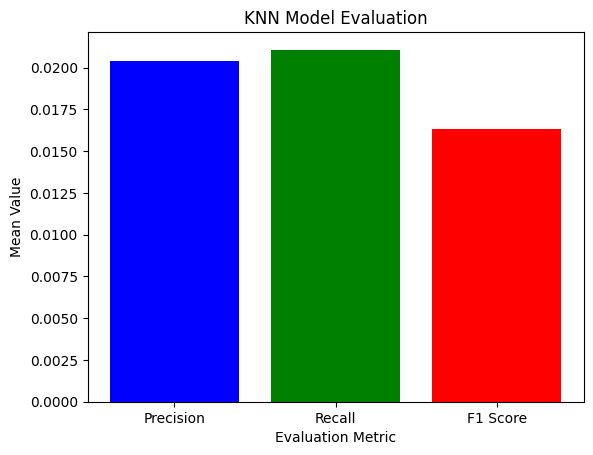

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
mean_precision, mean_recall, mean_f1 = evaluate_model(recommended_items, actual_interactions, top_N=5)

# Define the metrics and their corresponding values
metrics = ['Precision', 'Recall', 'F1 Score']
values = [mean_precision, mean_recall, mean_f1]

# Create a bar chart
plt.bar(metrics, values, color=['blue', 'green', 'red'])

# Add labels and a title
plt.xlabel('Evaluation Metric')
plt.ylabel('Mean Value')
plt.title('KNN Model Evaluation')

# Show the chart
plt.show()


In [ ]:
def HitRate(recommended_items, actual_interactions):
    hits = 0
    total = 0

    for boutique_id, recommended_client_ids in recommended_items.items():
        actual_clients = actual_interactions.get(boutique_id, [])  # Get the actual clients for this boutique
        total += len(actual_clients)  # Count the total number of actual interactions

        for client_id in actual_clients:
            if client_id in recommended_client_ids:
                hits += 1

    # Compute the overall Hit Rate
    hit_rate = hits / total if total > 0 else 0
    return hit_rate


In [ ]:
hit_rate = HitRate(recommended_items, actual_interactions)
print("Hit Rate:", hit_rate)

Hit Rate: 0.0026471930625285257


**SVD Model test**

top N by sector

In [ ]:
from scipy.sparse.linalg import svds
import numpy as np
from scipy.sparse import coo_matrix
Secteur_client_interactions = nbrA.groupby(['Secteur', 'id_client'])['Nombre_A_ou_MA'].sum().reset_index()

interaction_matrix = nbrA.pivot_table(index='id_client', columns='Secteur', values='Nombre_A_ou_MA', aggfunc='sum').fillna(0)

# Create a sparse matrix using the interaction data
interaction_matrix_sparse = coo_matrix(interaction_matrix)

# Perform matrix factorization using SVD
k = 5  # Number of latent factors
U, S, Vt = svds(interaction_matrix_sparse, k=k)
interaction_matrix_pred = np.dot(U, np.dot(np.diag(S), Vt))

# Input the target sector name
target_sector_name = input("Enter the target sector name: ")

# Get the column index corresponding to the target sector
target_sector_index = interaction_matrix.columns.get_loc(target_sector_name)

# Define the number of recommended clients
N = 5  # Number of recommended clients

# Loop through each client
recommended_clients = np.argsort(interaction_matrix_pred[:, target_sector_index])[::-1][:N]

# Map client indices to client names using a dictionary
client_ids_to_names = dict(zip(nbrA['id_client'], nbrA['nom_prenom']))

#client_ids_to_names = df.set_index('id_client')['nom_prenom']
recommended_client_names = [client_ids_to_names.get(client_id, 'unknown') for client_id in recommended_clients]


# Print the recommended client names for the target sector
print(f"Recommended Clients for Sector {target_sector_name}: {recommended_client_names}")

Enter the target sector name: Restaurants
Recommended Clients for Sector Restaurants: ['Redissi Fatma', 'unknown', 'unknown', 'unknown', 'SedreouiMooda']


top N by boutique

In [ ]:
from scipy.sparse.linalg import svds

boutique_client_interactionsS = nbrA.groupby(['id_carte_fidélité', 'id_client'])['Nombre_A_ou_MA'].sum().reset_index()

matrixs = boutique_client_interactionsS.pivot_table(index='id_client', columns='id_carte_fidélité', values='Nombre_A_ou_MA', aggfunc='sum').fillna(0)

# Convert the pivot table to a sparse matrix for memory efficiency
interaction_matrix_sparseS = coo_matrix(matrixs)
# Assuming interaction_matrix is your user-item interaction matrix
U, S, Vt = svds(interaction_matrix_sparseS, k=5)
# Reconstruct the interaction matrix
interaction_matrix_predS = np.dot(U, np.dot(np.diag(S), Vt))

# Make recommendations for a given boutique
target_boutique_index = 7  # Replace with actual index
boutique_row = interaction_matrix_sparseS.getrow(target_boutique_index).toarray()
recommended_clients = np.argsort(boutique_row)[0][::-1][:N]

# Map client IDs to client names using the id_to_name_mapping dictionary
id_to_name_mapping = nbrA.set_index('id_client')['nom_prenom'].to_dict()
recommended_client_names = [id_to_name_mapping.get(client_id, 'unknown') for client_id in recommended_clients]
# Print the recommended client names
for i, client_name in enumerate(recommended_client_names):
    print(f"Top {i+1} Clients: {client_name}")



Top 1 Clients: Ghanmi Houssein
Top 2 Clients: unknown
Top 3 Clients: unknown
Top 4 Clients: unknown
Top 5 Clients: unknown


**calculate precision recall**

In [ ]:
import numpy as np
from scipy.sparse import coo_matrix

def calculate_precision_recall(interaction_matrix, predicted_matrix, target_boutique_index, top_N):
    # Convert the interaction_matrix to a dense numpy array
    interaction_matrix = interaction_matrix.toarray()

    actual_interactions = np.nonzero(interaction_matrix[target_boutique_index])[0]
    recommended_clients = np.argsort(predicted_matrix[target_boutique_index])[::-1][:top_N]

    true_positives = len(set(actual_interactions) & set(recommended_clients))
    false_positives = len(set(recommended_clients) - set(actual_interactions))
    false_negatives = len(set(actual_interactions) - set(recommended_clients))

    precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0

    return precision, recall


**grid search svd**

**Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score

# Define a range of k values to try
k_values = [5, 10, 15, 20]
top_N = 2  # Replace with your desired value

# Initialize lists to store cross-validation scores
cv_scores = []

# Loop through each k value and perform cross-validation
for k in k_values:
    U, S, Vt = svds(interaction_matrix_sparse, k=k)
    interaction_matrix_pred = np.dot(U, np.dot(np.diag(S), Vt))

    # Calculate precision, recall, or other metrics using interaction_matrix_pred
    precision, recall = calculate_precision_recall(interaction_matrix_sparse, interaction_matrix_pred, 10, 2)

    # Append the cross-validation score to the list
    cv_scores.append(recall)

# Find the k value with the best cross-validation score
best_k = k_values[np.argmax(cv_scores)]
print("cv scores:",cv_scores)
print("Recall:",recall)
print("Precision:",precision)
print("Best k value:", best_k)


cv scores: [1.0, 1.0, 1.0, 1.0]
Recall: 1.0
Precision: 0.5
Best k value: 5


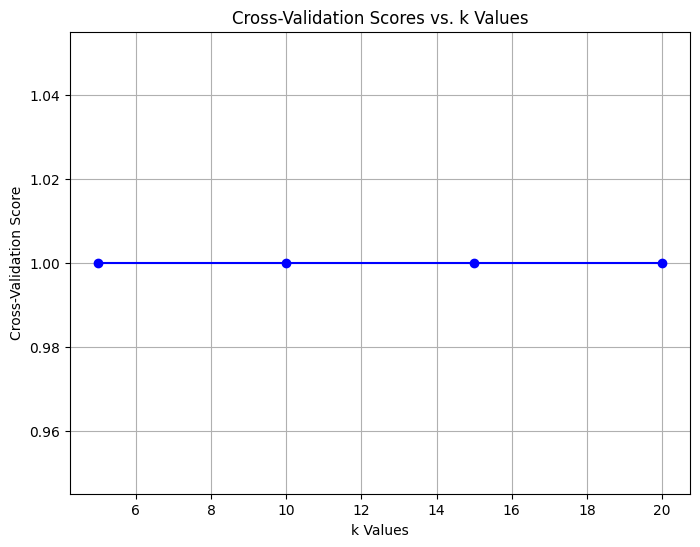

In [ ]:
import matplotlib.pyplot as plt

# Plot cross-validation scores vs. k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Scores vs. k Values')
plt.xlabel('k Values')
plt.ylabel('Cross-Validation Score')
plt.grid(True)
plt.show()


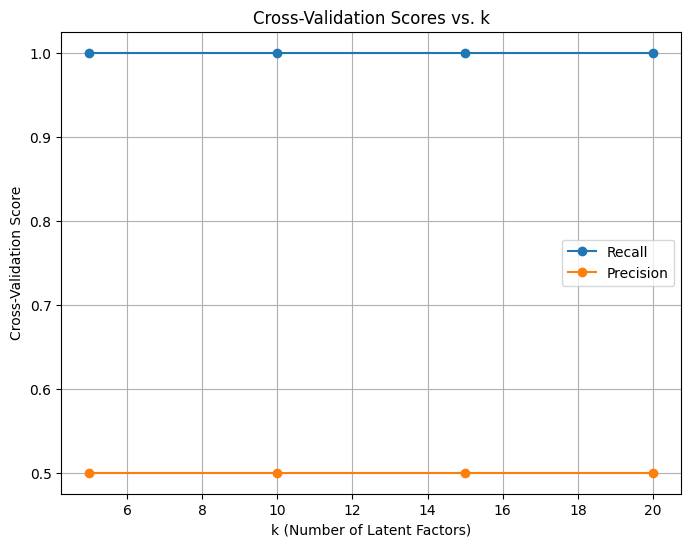

In [ ]:
import matplotlib.pyplot as plt

# Define a range of k values to try
k_values = [5, 10, 15, 20]

# Initialize lists to store cross-validation scores
cv_recall_scores = []
cv_precision_scores = []

# Loop through each k value and perform cross-validation
for k in k_values:
    U, S, Vt = svds(interaction_matrix_sparse, k=k)
    interaction_matrix_pred = np.dot(U, np.dot(np.diag(S), Vt))

    # Calculate precision, recall, or other metrics using interaction_matrix_pred
    precision, recall = calculate_precision_recall(interaction_matrix_sparse, interaction_matrix_pred, 10, 2)

    # Append the cross-validation scores to the respective lists
    cv_recall_scores.append(recall)
    cv_precision_scores.append(precision)

# Plot the cross-validation scores for recall and precision
plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_recall_scores, marker='o', linestyle='-', label='Recall')
plt.plot(k_values, cv_precision_scores, marker='o', linestyle='-', label='Precision')
plt.title('Cross-Validation Scores vs. k')
plt.xlabel('k (Number of Latent Factors)')
plt.ylabel('Cross-Validation Score')
plt.legend()
plt.grid(True)
plt.show()
